In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data=pd.read_csv(r'C:\Users\JOY STARK\Desktop\Datasets\knn\KNN_Project_Data.csv')
data.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0


In [3]:
x=data.iloc[:,0:-1]
y=data.iloc[:,-1]

In [4]:
from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
x=sc_x.fit_transform(x)


from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=101)

from sklearn.neighbors import KNeighborsClassifier
knc=KNeighborsClassifier(n_neighbors=1)
knc.fit(x_train,y_train)
predictions=knc.predict(x_test)

from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.73      0.72      0.72       152
           1       0.71      0.72      0.72       148

    accuracy                           0.72       300
   macro avg       0.72      0.72      0.72       300
weighted avg       0.72      0.72      0.72       300



Text(0, 0.5, 'Error_rate')

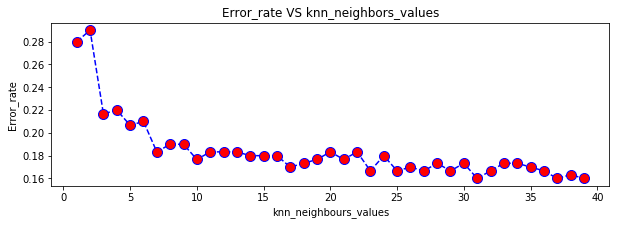

In [5]:
error_rate=[]
for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred=knn.predict(x_test)
    error_rate.append(np.mean(pred!=y_test))
    
plt.figure(figsize=(10,3))
plt.plot(range(1,40),error_rate,color='blue',marker='o',markersize=10,markerfacecolor='red',linestyle='dashed')
plt.title('Error_rate VS knn_neighbors_values')
plt.xlabel('knn_neighbours_values')
plt.ylabel('Error_rate')
#plt.axis([1,40,0,1])
#plt.xticks([i for i in range(1,40)])

In [6]:
#Here we see the error rate is minimum for neighbors_value 23
knn=KNeighborsClassifier(n_neighbors=23)
knn.fit(x_train,y_train)
predictions=knn.predict(x_test)
from sklearn.metrics import confusion_matrix,classification_report

print('Confusion matrix\n')
print(confusion_matrix(y_test,predictions))
print('\n')
print('classification_report\n')
print(classification_report(y_test,predictions))

Confusion matrix

[[124  28]
 [ 22 126]]


classification_report

              precision    recall  f1-score   support

           0       0.85      0.82      0.83       152
           1       0.82      0.85      0.83       148

    accuracy                           0.83       300
   macro avg       0.83      0.83      0.83       300
weighted avg       0.83      0.83      0.83       300



In [7]:
knn.score(x_test,y_test)

0.8333333333333334